In [1]:
import numpy as np
import pandas as pd

with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
business_df = pd.read_json(data_json_str)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Attire': 'casual', 'Outdoor Seating': False,...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Monday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{'Good For Groups': True, 'Price Range': 1, 'O...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
4,"{'Parking': {'street': False, 'valet': False, ...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Thursday': {'close': '17:00', 'open': '10:00...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business


In [2]:
with open('yelp_academic_dataset_checkin.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
checkin_df = pd.read_json(data_json_str)
checkin_df.head()

,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{'10-0': 1, '14-6': 1, '17-3': 1, '17-6': 1, '...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{'15-0': 1, '21-4': 1, '14-4': 2, '22-5': 1, '...",checkin
2,KayYbHCt-RkbGcPdGOThNg,"{'17-5': 1, '15-0': 1, '10-3': 1, '11-0': 2, '...",checkin
3,b12U9TFESStdy7CsTtcOeg,"{'5-1': 2, '8-2': 1, '5-5': 2}",checkin
4,QoDa50dc7g62xciFygXB9w,"{'12-1': 1, '13-3': 1, '16-0': 1, '9-3': 1, '1...",checkin


In [3]:
final_df = pd.merge(business_df,checkin_df,on="business_id")
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type_x,checkin_info,type_y
0,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,"{'10-0': 1, '14-6': 1, '17-3': 1, '17-6': 1, '...",checkin
1,"{'Attire': 'casual', 'Outdoor Seating': False,...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{'Saturday': {'close': '16:00', 'open': '10:00...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,business,"{'15-0': 1, '21-4': 1, '14-4': 2, '22-5': 1, '...",checkin
2,"{'Attire': 'casual', 'Outdoor Seating': True, ...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Thursday': {'close': '02:00', 'open': '11:00...",40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,21,4.0,PA,business,"{'17-5': 1, '15-0': 1, '10-3': 1, '11-0': 2, '...",checkin
3,{},b12U9TFESStdy7CsTtcOeg,"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Thursday': {'close': '19:00', 'open': '07:30...",40.394588,-80.084454,Flynn's Tire And Auto Service,[],True,7,2.5,PA,business,"{'5-1': 2, '8-2': 1, '5-5': 2}",checkin
4,{},QoDa50dc7g62xciFygXB9w,"[Veterinarians, Pets]",Pittsburgh,"2080 Greentree Rd\nPittsburgh, PA 15220",{},40.392207,-80.069134,Greentree Animal Clinic,[],True,5,4.0,PA,business,"{'12-1': 1, '13-3': 1, '16-0': 1, '9-3': 1, '1...",checkin


In [4]:
#final_df = final_df[(final_df.latitude < 34.95) and (final_df.longitude < -110.5)]
final_df = final_df.query('(latitude < 34.95) and (longitude < -110.5)')
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type_x,checkin_info,type_y
1577,"{'Price Range': 2, 'Dogs Allowed': True, 'Acce...",KyXO7gXGVdpPJ1enxIf3Ig,"[Hotels & Travel, Event Planning & Services, H...",Glendale,"14071 E Iliff Ave\nGlendale, AZ 85308","{'Thursday': {'close': '00:00', 'open': '00:00...",33.638630,-112.179234,Comfort Inn Denver Southeast Area,[],True,6,2.0,AZ,business,"{'17-2': 1, '13-5': 1, '10-2': 1, '21-2': 1, '...",checkin
1578,"{'Attire': 'casual', 'Outdoor Seating': False,...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004","{'Thursday': {'close': '00:00', 'open': '10:00...",33.479482,-112.073681,Domino's Pizza,[],True,16,2.5,AZ,business,"{'23-6': 1, '18-2': 1, '22-5': 1, '17-3': 1, '...",checkin
1579,"{'Good for Kids': True, 'Takes Reservations': ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468547,-112.075085,Viad Tower Restaurants,[],True,6,3.5,AZ,business,"{'14-5': 1, '10-1': 1, '12-0': 4, '11-0': 2, '...",checkin
1580,"{'Attire': 'casual', 'Outdoor Seating': True, ...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Saturday': {'close': '03:00', 'open': '09:00...",33.448399,-112.071702,Sky Lounge,[],True,25,2.5,AZ,business,"{'22-4': 3, '1-5': 1, '22-5': 4, '21-2': 2, '0...",checkin
1581,"{'Outdoor Seating': True, 'Smoking': 'outdoor'...",SiwN7f0N4bs4ZtPc4yPgiA,"[Bars, Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.455885,-112.074177,Palazzo,[],True,19,3.0,AZ,business,"{'19-3': 1, '21-4': 4, '22-4': 8, '18-3': 1, '...",checkin


/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


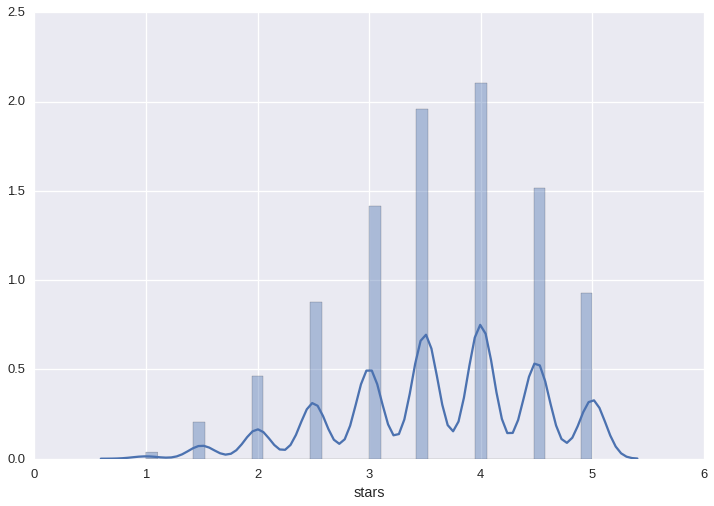

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12,8))
sns.set_context("talk")
sns.distplot(final_df.stars)

In [6]:
def get_multihour_pop(row, startHr,endHr):
    checkins = row['checkin_info']
    freq = 0
    for x in range(startHr, endHr):
        for k,v in checkins.items():
            hr = int(k.split('-')[0])
            if hr == x:
                freq += v
    return freq

final_df['0-6_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 0, 6),axis=1)
final_df['6-12_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 6, 12),axis=1)
final_df['12-18_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 12, 18),axis=1)
final_df['18-24_checkins'] = final_df.apply (lambda row: get_multihour_pop(row, 18, 24),axis=1)
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,review_count,stars,state,type_x,checkin_info,type_y,0-6_checkins,6-12_checkins,12-18_checkins,18-24_checkins
1577,"{'Price Range': 2, 'Dogs Allowed': True, 'Acce...",KyXO7gXGVdpPJ1enxIf3Ig,"[Hotels & Travel, Event Planning & Services, H...",Glendale,"14071 E Iliff Ave\nGlendale, AZ 85308","{'Thursday': {'close': '00:00', 'open': '00:00...",33.638630,-112.179234,Comfort Inn Denver Southeast Area,[],...,6,2.0,AZ,business,"{'17-2': 1, '13-5': 1, '10-2': 1, '21-2': 1, '...",checkin,0,1,2,3
1578,"{'Attire': 'casual', 'Outdoor Seating': False,...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004","{'Thursday': {'close': '00:00', 'open': '10:00...",33.479482,-112.073681,Domino's Pizza,[],...,16,2.5,AZ,business,"{'23-6': 1, '18-2': 1, '22-5': 1, '17-3': 1, '...",checkin,0,1,4,8
1579,"{'Good for Kids': True, 'Takes Reservations': ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468547,-112.075085,Viad Tower Restaurants,[],...,6,3.5,AZ,business,"{'14-5': 1, '10-1': 1, '12-0': 4, '11-0': 2, '...",checkin,0,9,106,1
1580,"{'Attire': 'casual', 'Outdoor Seating': True, ...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Saturday': {'close': '03:00', 'open': '09:00...",33.448399,-112.071702,Sky Lounge,[],...,25,2.5,AZ,business,"{'22-4': 3, '1-5': 1, '22-5': 4, '21-2': 2, '0...",checkin,15,0,6,35
1581,"{'Outdoor Seating': True, 'Smoking': 'outdoor'...",SiwN7f0N4bs4ZtPc4yPgiA,"[Bars, Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.455885,-112.074177,Palazzo,[],...,19,3.0,AZ,business,"{'19-3': 1, '21-4': 4, '22-4': 8, '18-3': 1, '...",checkin,8,1,0,42


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#PROBLEM HERE
time_dist = {'0-1':0,'1-2':0,'2-3':0,'3-4':0,'4-5':0,'5-6':0,'6-7':0,'7-8':0,'8-9':0,'9-10':0,'10-11':0,'11-12':0,
            '12-13':0,'13-14':0,'14-15':0,'15-16':0,'16-17':0,'17-18':0,'18-19':0,'19-20':0,'20-21':0,'21-22':0,'22-23':0,'23-0':0}

def merge_dict(left, right):
    for k, v in right.items():
        if k in left:
            left[k] += v
        else:
            left[k] = v
    return left

time_dist = {}
for index, row in final_df.iterrows():
    #print(row['checkin_info'].values)
    time_dist = merge_dict(time_dist, row['checkin_info'])
    #for k, v in row['checkin_info'].items():
     #   time_dist[k] += v

d = {'Time Window': pd.Series(['0-6', '6-12',  '12-18', '18-24']),
    'Count': pd.Series([sum(final_df['0-6_checkins'].values), sum(final_df['6-12_checkins'].values), sum(final_df['12-18_checkins'].values), sum(final_df['18-24_checkins'].values)])}



#ax = sns.countplot(x='Count', data=df)

In [8]:
df = pd.DataFrame({"time window": list(time_dist.keys()), "count": list(time_dist.values())})
df.head()

,count,time window
0,12235,7-3
1,38933,19-3
2,14091,21-3
3,12235,8-0
4,15134,8-4


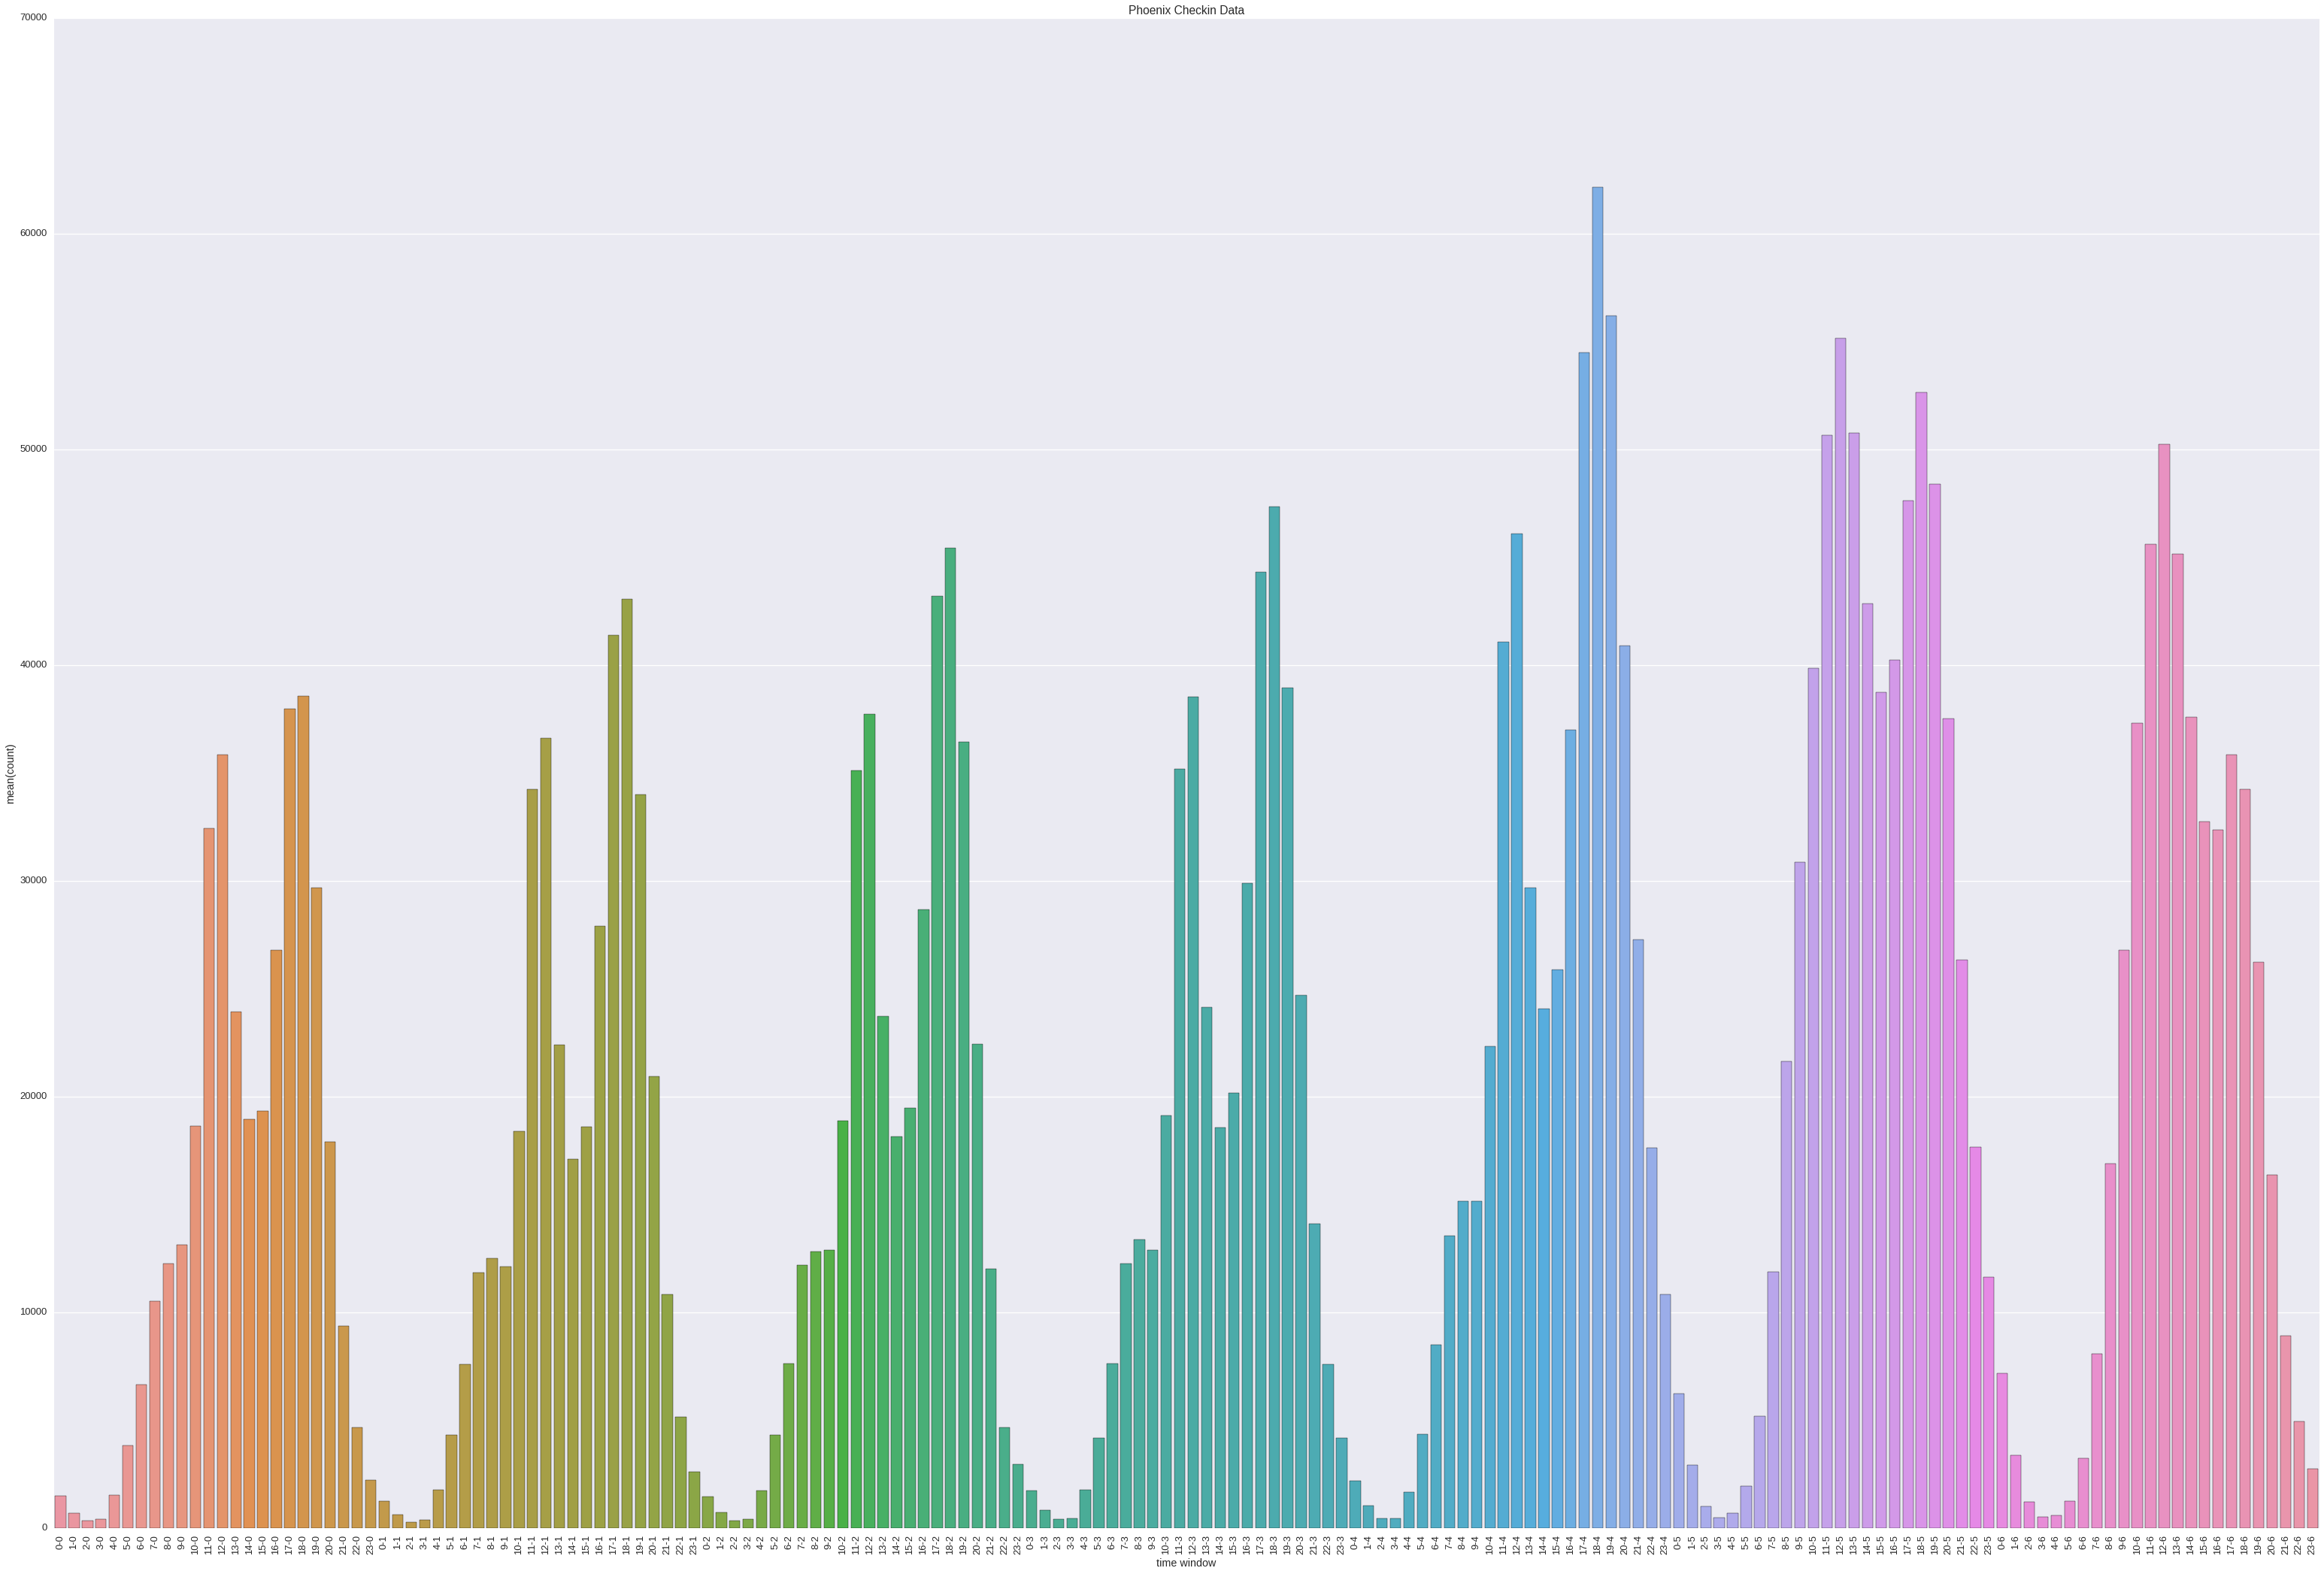

In [18]:
def get_sort_weight(row):
    parts = row['time window'].split('-')
    return int(parts[0]) + ((int(parts[1])+1)*24)

sns.set()
plt.figure(figsize=(54,36))
df['sort_weights'] = df.apply(lambda row: get_sort_weight(row), axis=1)
sorted_df = df.sort_values('sort_weights', ascending=True)
sns.set_context("talk")
ax = sns.barplot(x='time window', y='count', data=sorted_df)
ax.set_xticklabels(rotation=90, labels=sorted_df['time window'].values)
ax.set_title("Phoenix Checkin Data")

In [10]:
df.head()

,count,time window,sort_weights
0,12235,7-3,103
1,38933,19-3,115
2,14091,21-3,117
3,12235,8-0,32
4,15134,8-4,128


In [11]:
sorted_df.head()

,count,time window,sort_weights
51,1479,0-0,24
55,672,1-0,25
14,338,2-0,26
48,418,3-0,27
114,1528,4-0,28


In [12]:
"""
Alpha top-level categorical mapping
"""
def map_categories(row):
    category_map = {'Active Life': 0, 
                   'Arts & Entertainment': 1,
                   'Automotive': 2,
                   'Beauty & Spas': 3,
                   'Education': 4,
                   'Event Planning & Services': 5,
                   'Financial Services': 6,
                   'Food': 7,
                   'Health & Medical': 8,
                   'Home Services': 9,
                   'Hotels & Travel': 10,
                   'Local Flavor': 11,
                   'Local Services': 12,
                   'Mass Media': 13,
                   'Nightlife': 14,
                   'Pets': 15,
                   'Professional Services': 16,
                   'Public Services & Government': 17,
                   'Real Estate': 18,
                   'Religious Organizations': 19,
                   'Restaurants': 20,
                   'Shopping': 21}
    for cat in row['categories']:
        if cat in category_map:
            return category_map[cat]
    return -1   # Some entries have no listed categories

def get_total_checkins(row):
    return row['0-6_checkins'] +row['6-12_checkins'] +row['12-18_checkins'] + row['18-24_checkins']
        

final_df['top_category_dummy'] = final_df.apply (lambda row: map_categories(row),axis=1)
final_df['total_checkins'] = final_df.apply (lambda row: get_total_checkins(row),axis=1)
final_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,...,state,type_x,checkin_info,type_y,0-6_checkins,6-12_checkins,12-18_checkins,18-24_checkins,top_category_dummy,total_checkins
1577,"{'Price Range': 2, 'Dogs Allowed': True, 'Acce...",KyXO7gXGVdpPJ1enxIf3Ig,"[Hotels & Travel, Event Planning & Services, H...",Glendale,"14071 E Iliff Ave\nGlendale, AZ 85308","{'Thursday': {'close': '00:00', 'open': '00:00...",33.638630,-112.179234,Comfort Inn Denver Southeast Area,[],...,AZ,business,"{'17-2': 1, '13-5': 1, '10-2': 1, '21-2': 1, '...",checkin,0,1,2,3,10,6
1578,"{'Attire': 'casual', 'Outdoor Seating': False,...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004","{'Thursday': {'close': '00:00', 'open': '10:00...",33.479482,-112.073681,Domino's Pizza,[],...,AZ,business,"{'23-6': 1, '18-2': 1, '22-5': 1, '17-3': 1, '...",checkin,0,1,4,8,20,13
1579,"{'Good for Kids': True, 'Takes Reservations': ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468547,-112.075085,Viad Tower Restaurants,[],...,AZ,business,"{'14-5': 1, '10-1': 1, '12-0': 4, '11-0': 2, '...",checkin,0,9,106,1,20,116
1580,"{'Attire': 'casual', 'Outdoor Seating': True, ...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{'Saturday': {'close': '03:00', 'open': '09:00...",33.448399,-112.071702,Sky Lounge,[],...,AZ,business,"{'22-4': 3, '1-5': 1, '22-5': 4, '21-2': 2, '0...",checkin,15,0,6,35,14,56
1581,"{'Outdoor Seating': True, 'Smoking': 'outdoor'...",SiwN7f0N4bs4ZtPc4yPgiA,"[Bars, Nightlife, Dance Clubs]",Phoenix,"710 N Central Ave\nPhoenix, AZ 85004",{},33.455885,-112.074177,Palazzo,[],...,AZ,business,"{'19-3': 1, '21-4': 4, '22-4': 8, '18-3': 1, '...",checkin,8,1,0,42,14,51


In [13]:
"""Attempting K-means clustering to determine rating"""

from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
"""
for x in final_df['top_category_dummy'].values:
    if not np.isfinite(x):
        print(str(x) + " is not finite")
"""

clf = KMeans(n_clusters=20)
X = final_df[['latitude','longitude','total_checkins', 'top_category_dummy']]
y = final_df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test)


-3588376609.2686715

In [14]:
"""Attempting K-means clustering to determine rating"""

from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
"""
for x in final_df['top_category_dummy'].values:
    if not np.isfinite(x):
        print(str(x) + " is not finite")
"""

clf = KMeans(n_clusters=40)
X = final_df[['latitude','longitude']]
y = final_df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test)

-9.0829332302455441

In [15]:
"""Attempting perceptron to determine rating"""
import skflow
from sklearn.metrics import accuracy_score

X = final_df[['latitude','longitude','total_checkins', 'top_category_dummy']].astype(int)

print(X.head())
y = final_df['stars'].astype(int)

y = y - 1

print(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[5], n_classes=5, learning_rate=0.05)
classifier.fit(X_train, y_train)
score = accuracy_score(y_test, classifier.predict(X_test))
print("Accuracy: %f", score)


      latitude  longitude  total_checkins  top_category_dummy
1577        33       -112               6                  10
1578        33       -112              13                  20
1579        33       -112             116                  20
1580        33       -112              56                  14
1581        33       -112              51                  14
[1 2 3 0 4]


/usr/local/lib/python3.4/dist-packages/skflow/io/data_feeder.py:217: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out.itemset((i, self.y[sample]), 1.0)


TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use the logical TensorFlow ops to test the value of a tensor.

In [ ]:
import tensorflow.contrib.learn as skflow
from sklearn import datasets, metrics

iris = datasets.load_iris()
classifier = skflow.TensorFlowDNNClassifier(hidden_units=[10, 20, 10], n_classes=3)
classifier.fit(iris.data, iris.target)
score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))
print("Accuracy: %f" % score)